In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

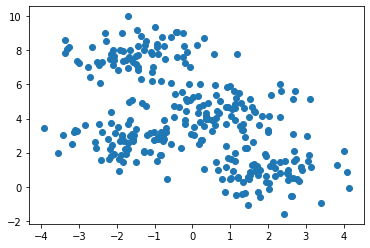

In [138]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.90, 
                       random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('')
plt.show()

In [139]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

In [140]:
kmeans = GaussianMixture(n_components=4)
kmeans.fit(X)
kmeans_cluster_labels = kmeans.predict(X)


In [141]:
gm = GaussianMixture(n_components=4)
gm.fit(X)
gm_cluster_labels = gm.predict(X)


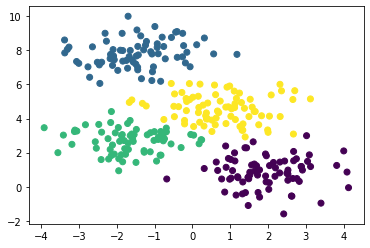

In [142]:
scatter = plt.scatter(X[:,0],X[:,1],
                     c=gm_cluster_labels)

In [143]:
db = DBSCAN(eps=0.78, min_samples=15)
db.fit(X)
db_cluster_labels = db.fit_predict(X)

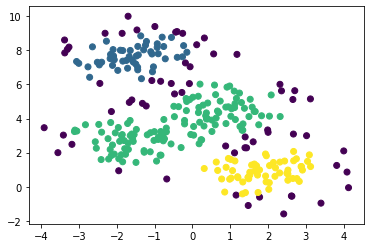

In [144]:
scatter = plt.scatter(X[:,0],X[:,1],
                     c=db_cluster_labels)

In [145]:
ac = AgglomerativeClustering(n_clusters=4)
ac.fit(X)
ac_cluster_labels = ac.fit_predict(X)

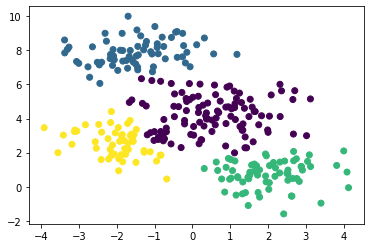

In [146]:
scatter = plt.scatter(X[:,0],X[:,1],
                     c=ac_cluster_labels)

In [147]:
data = pd.read_csv("Mall_Customers.csv")
data = data.iloc[:,3:5]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


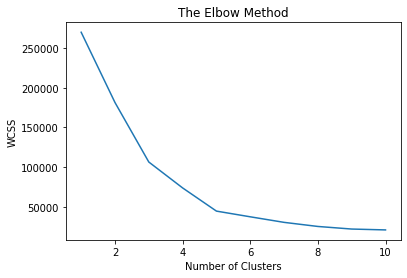

In [148]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, max_iter = 300, n_init = 10, random_state = 0)
    kmeans = kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

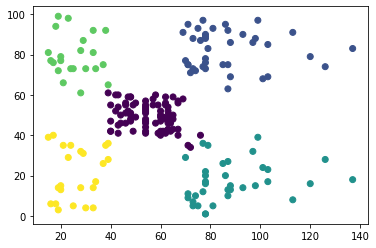

In [149]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)
labels=kmeans.predict(data)
plt.scatter(data.values[:,0],data.values[:,1],
            c=labels)